# Crédits:

### Guillaume Gosset, Quentin Lasota (qui ont fait beaucoup plus que ça !)

In [1]:
import numpy as np
import pandas as pnd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import math as mt
import seaborn as sn

from collections import Counter

loadingPath = "pokemon-dataset"
#opening and reading file from data

In [2]:
#loading pokedex
currentFile = open(loadingPath+"/pokemon.csv")
pokedex = pnd.read_csv(currentFile)


cols = pokedex.columns[1:]
print(pokedex[cols].head().to_latex())
print(pokedex[cols].tail().to_latex())
pokedex[cols]

\begin{tabular}{llllrrrrrrrl}
\toprule
{} &           Name & Type 1 &  Type 2 &  HP &  Attack &  Defense &  Sp. Atk &  Sp. Def &  Speed &  Generation &  Legendary \\
\midrule
0 &      Bulbasaur &  Grass &  Poison &  45 &      49 &       49 &       65 &       65 &     45 &           1 &      False \\
1 &        Ivysaur &  Grass &  Poison &  60 &      62 &       63 &       80 &       80 &     60 &           1 &      False \\
2 &       Venusaur &  Grass &  Poison &  80 &      82 &       83 &      100 &      100 &     80 &           1 &      False \\
3 &  Mega Venusaur &  Grass &  Poison &  80 &     100 &      123 &      122 &      120 &     80 &           1 &      False \\
4 &     Charmander &   Fire &     NaN &  39 &      52 &       43 &       60 &       50 &     65 &           1 &      False \\
\bottomrule
\end{tabular}

\begin{tabular}{llllrrrrrrrl}
\toprule
{} &            Name &   Type 1 & Type 2 &  HP &  Attack &  Defense &  Sp. Atk &  Sp. Def &  Speed &  Generation &  Legendary \\


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [3]:
#loading training data
currentFile = open(loadingPath+"/combats.csv")
training = pnd.read_csv(currentFile)

print(training.head().to_latex())
print(training.tail().to_latex())
training

\begin{tabular}{lrrr}
\toprule
{} &  First\_pokemon &  Second\_pokemon &  Winner \\
\midrule
0 &            266 &             298 &     298 \\
1 &            702 &             701 &     701 \\
2 &            191 &             668 &     668 \\
3 &            237 &             683 &     683 \\
4 &            151 &             231 &     151 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
{} &  First\_pokemon &  Second\_pokemon &  Winner \\
\midrule
49995 &            707 &             126 &     707 \\
49996 &            589 &             664 &     589 \\
49997 &            303 &             368 &     368 \\
49998 &            109 &              89 &     109 \\
49999 &              9 &              73 &       9 \\
\bottomrule
\end{tabular}



,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


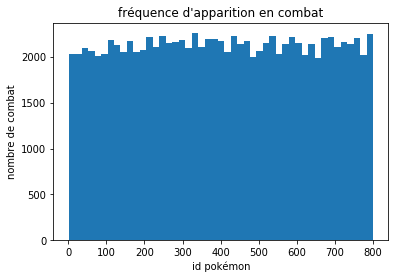

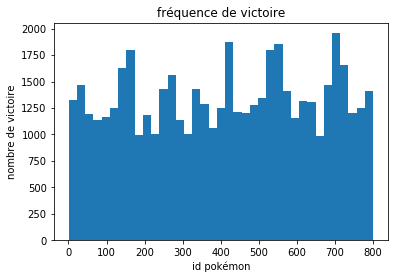

In [4]:
#affichage de statistiques sur les données 
#display databalancing and reprensentation of pokemons in fight
def dataBalance(fightDataFrame):
    fightCount = []
    winner = []

    for index, current in fightDataFrame.iterrows():
        fightCount.append(current['First_pokemon'])
        fightCount.append(current['Second_pokemon'])
        winner.append(current['Winner'])

    plt.figure()
    plt.hist(fightCount,bins="auto")
    plt.title("fréquence d'apparition en combat")
    plt.xlabel("id pokémon")
    plt.ylabel("nombre de combat")
    
    plt.figure()
    plt.hist(winner,bins="auto")
    plt.title("fréquence de victoire")
    plt.xlabel("id pokémon")
    plt.ylabel("nombre de victoire")
    plt.show()

displayDataBalancing=True
if displayDataBalancing:
    dataBalance(training)